<a href="https://colab.research.google.com/github/shibbolithic/housepriceprediction/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

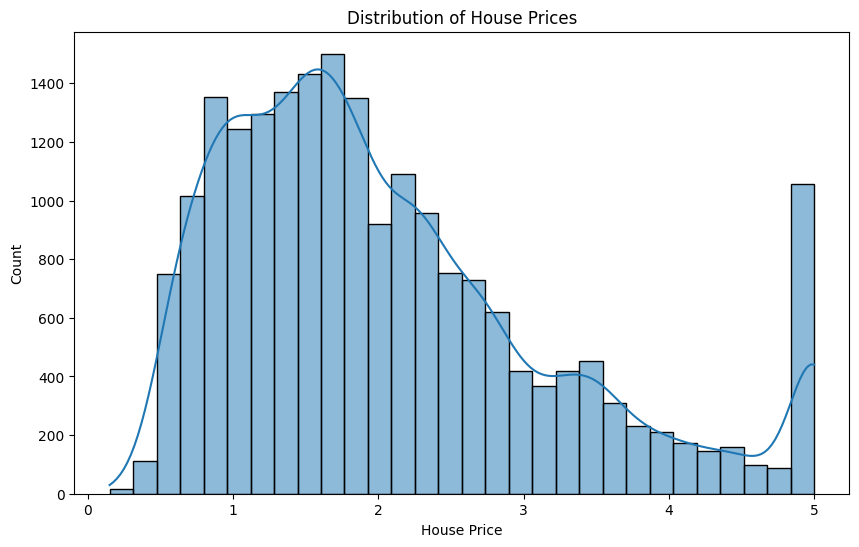

In [ ]:

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.show()


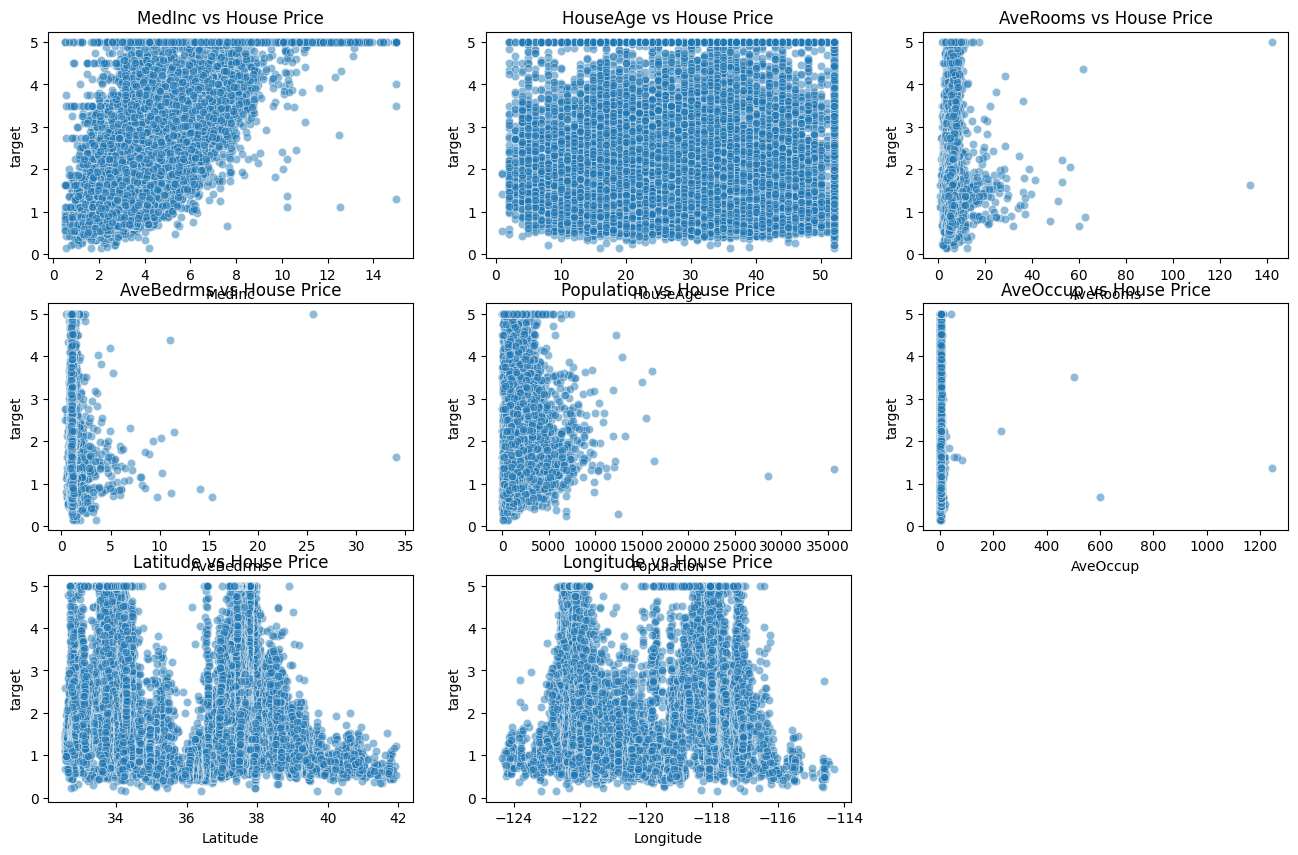

In [ ]:

# Explore relationships between features and target variable
plt.figure(figsize=(16, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=feature, y='target', data=df, alpha=0.5)
    plt.title(f'{feature} vs House Price')


In [ ]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.show()

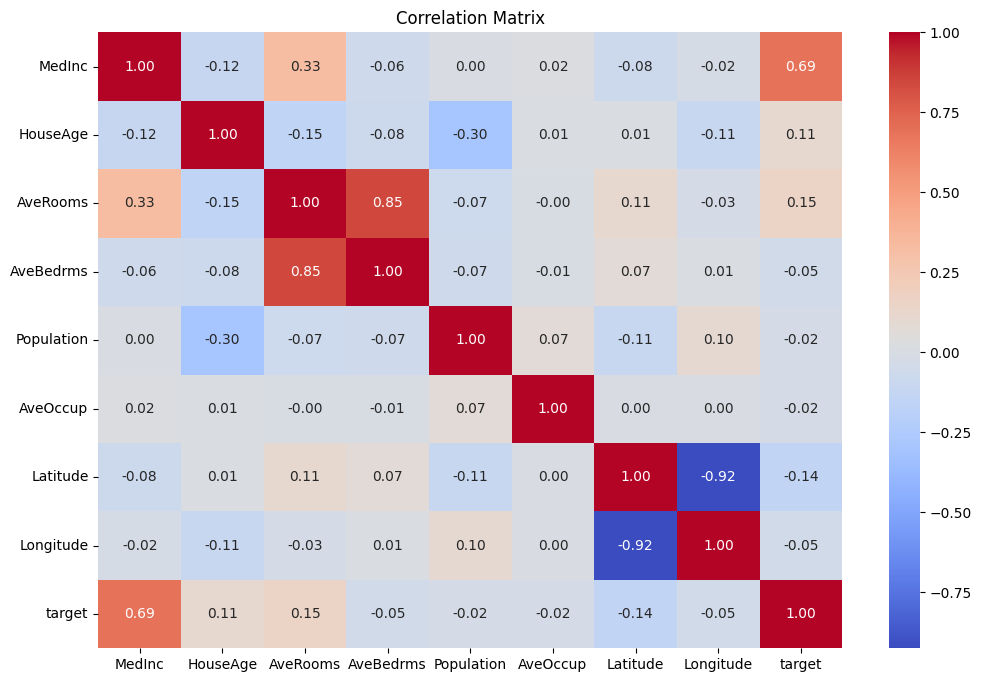

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Build a simple neural network model using TensorFlow
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
413/413 - 4s - loss: 0.9722 - val_loss: 0.4984 - 4s/epoch - 11ms/step
Epoch 2/50
413/413 - 3s - loss: 0.4265 - val_loss: 0.4247 - 3s/epoch - 7ms/step
Epoch 3/50
413/413 - 2s - loss: 0.3849 - val_loss: 0.4291 - 2s/epoch - 4ms/step
Epoch 4/50
413/413 - 1s - loss: 0.3724 - val_loss: 0.3900 - 1s/epoch - 3ms/step
Epoch 5/50
413/413 - 1s - loss: 0.3697 - val_loss: 0.3935 - 1s/epoch - 3ms/step
Epoch 6/50
413/413 - 1s - loss: 0.3532 - val_loss: 0.3935 - 1s/epoch - 3ms/step
Epoch 7/50
413/413 - 1s - loss: 0.3432 - val_loss: 0.3794 - 766ms/epoch - 2ms/step
Epoch 8/50
413/413 - 1s - loss: 0.3453 - val_loss: 0.3757 - 714ms/epoch - 2ms/step
Epoch 9/50
413/413 - 1s - loss: 0.3353 - val_loss: 0.3633 - 731ms/epoch - 2ms/step
Epoch 10/50
413/413 - 1s - loss: 0.3306 - val_loss: 0.3545 - 736ms/epoch - 2ms/step
Epoch 11/50
413/413 - 1s - loss: 0.3217 - val_loss: 0.3511 - 752ms/epoch - 2ms/step
Epoch 12/50
413/413 - 1s - loss: 0.3198 - val_loss: 0.3474 - 766ms/epoch - 2ms/step
Epoch 13/50
413/41

In [ ]:

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


129/129 [==============================] - 0s 2ms/step
Mean Squared Error on Test Set: 0.29000620976150676
